**In this notebook we are going to explore various analyzing tools and find out how spotify top 50 songs are behaving.**

In [157]:
# install the prerequisite libraries
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import boxcox


In [158]:
# import the dataset and show the first 10 rows
df = pd.read_csv('data_top50.csv', encoding='ISO-8859-1')
df.head(10)

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,185,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


In [159]:
# shows the statics of the dataset
df.describe()

,Unnamed: 0,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
count,50.000,50.000,50.000,50.00,50.000,50.000,50.000,50.000,50.000,50.000,50.000
mean,25.500,120.060,64.060,71.38,-1.840,14.660,54.600,200.960,22.160,12.480,87.500
std,14.577,30.898,14.232,11.93,27.041,11.118,22.336,39.144,18.996,11.162,4.491
min,1.000,85.000,32.000,29.00,-11.000,5.000,10.000,115.000,1.000,3.000,70.000
25%,13.250,96.000,55.250,67.00,-6.750,8.000,38.250,176.750,8.250,5.000,86.000
50%,25.500,104.500,66.500,73.50,-5.500,11.000,55.500,198.000,15.000,7.000,88.000
75%,37.750,137.500,74.750,79.75,-4.000,15.750,69.500,217.500,33.750,15.000,90.750
max,50.000,190.000,88.000,90.00,185.000,58.000,95.000,309.000,75.000,46.000,95.000


In [160]:
# shape of the dataset
df.shape

(50, 14)

In [161]:
# Renaming the columns
df.rename(columns={'Track.Name': 'track_name', 'Artist.Name': 'artist_name',
                   'Beats.Per.Minute': 'beats_per_minute', 'Loudness..dB..': 'Loudness(dB)',
                   'Valence.': 'Valence', 'Length.': 'Length', 'Acousticness..': 'Acousticness',
                   'Speechiness.': 'Speechiness'}, inplace=True)
df.head()

,Unnamed: 0,track_name,artist_name,Genre,beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,185,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [162]:
# finds the null values/ empty values in the dataset and fills them with 0
print(df.isnull().sum())
df.fillna(0)

Unnamed: 0          0
track_name          0
artist_name         0
Genre               0
beats_per_minute    0
Energy              0
Danceability        0
Loudness(dB)        0
Liveness            0
Valence             0
Length              0
Acousticness        0
Speechiness         0
Popularity          0
dtype: int64


,Unnamed: 0,track_name,artist_name,Genre,beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,185,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


In [163]:
# The datatypes of the different attributes of the dataset
df.dtypes

Unnamed: 0           int64
track_name          object
artist_name         object
Genre               object
beats_per_minute     int64
Energy               int64
Danceability         int64
Loudness(dB)         int64
Liveness             int64
Valence              int64
Length               int64
Acousticness         int64
Speechiness          int64
Popularity           int64
dtype: object

In [164]:
# shows all types of hip hop genre and how many songs belongs to each categary
df['Genre'].value_counts()

dance pop           8
pop                 7
latin               5
canadian hip hop    3
edm                 3
brostep             2
electropop          2
canadian pop        2
panamanian pop      2
dfw rap             2
reggaeton flow      2
reggaeton           2
country rap         2
pop house           1
australian pop      1
big room            1
trap music          1
escape room         1
r&b en espanol      1
atl hip hop         1
boy band            1
Name: Genre, dtype: int64

In [165]:
# shows artists with no.of songs
df['artist_name'].value_counts()

Ed Sheeran          4
Marshmello          2
Sech                2
Shawn Mendes        2
Billie Eilish       2
Lil Nas X           2
The Chainsmokers    2
J Balvin            2
Post Malone         2
Ariana Grande       2
Lil Tecca           1
Lauv                1
Katy Perry          1
Nicky Jam           1
MEDUZA              1
Khalid              1
Drake               1
ROSALÍA             1
Bad Bunny           1
Jonas Brothers      1
Lewis Capaldi       1
Maluma              1
Lunay               1
Anuel AA            1
Ali Gatie           1
Daddy Yankee        1
Y2K                 1
Jhay Cortez         1
Lady Gaga           1
Lizzo               1
Taylor Swift        1
Kygo                1
Tones and I         1
Chris Brown         1
Martin Garrix       1
Young Thug          1
DJ Snake            1
Sam Smith           1
Name: artist_name, dtype: int64

[skewness](https://en.wikipedia.org/wiki/Skewn) is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive, zero, negative, or undefined. 

`Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.`

Unnamed: 0          0.000
beats_per_minute    0.855
Energy             -0.453
Danceability       -1.380
Loudness(dB)        7.007
Liveness            2.204
Valence            -0.046
Length              0.749
Acousticness        1.135
Speechiness         1.378
Popularity         -1.503
dtype: float64


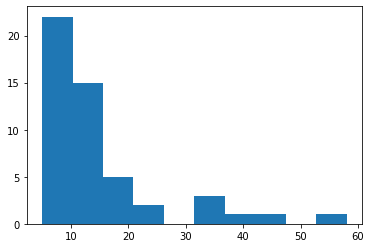

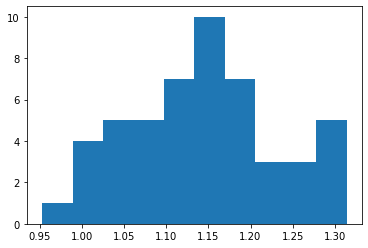

In [166]:
# Finding out the skew for each attribute

skew = df.skew()
print(skew)

# Removing the skew by using the boxcox transformations
transform = np.asarray(df['Liveness'])

df_transform = boxcox(transform)[0]

# Plotting a histogram to show the difference
plt.hist(df['Liveness'], bins=10)  # original data
plt.show()

plt.hist(df_transform, bins=10)  # corrected skew data
plt.show()

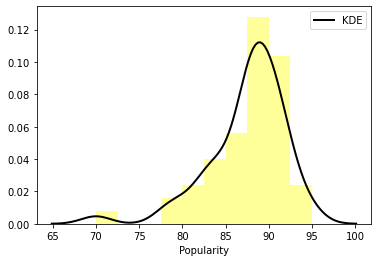

(array([ 1.,  3.,  7.,  3., 12., 11.,  7.,  3.,  1.,  2.]),
 array([1.44740398e+15, 3.38216964e+15, 5.31693529e+15, 7.25170095e+15,
        9.18646661e+15, 1.11212323e+16, 1.30559979e+16, 1.49907636e+16,
        1.69255292e+16, 1.88602949e+16, 2.07950605e+16]),
 <a list of 10 Patch objects>)

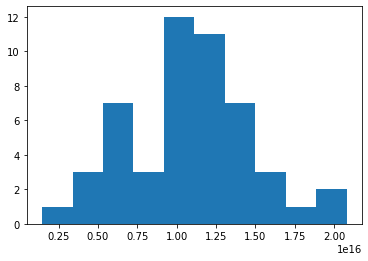

In [167]:
transform1=np.asarray(df['Popularity'])
df_transform1 = boxcox(transform1)[0]


sns.distplot(df['Popularity'],bins=10,kde=True,kde_kws={"color": "k", "lw": 2, "label": "KDE"},color='yellow')
plt.show()


plt.hist(df_transform1, bins=10)

In [168]:
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
correlation=df.corr(method='spearman')
print(correlation)

                  Unnamed: 0  beats_per_minute  Energy  Danceability  Loudness(dB)  Liveness  \
Unnamed: 0             1.000            -0.263   0.132         0.053        -0.086     0.102   
beats_per_minute      -0.263             1.000   0.012        -0.092         0.025    -0.033   
Energy                 0.132             0.012   1.000        -0.049         0.579     0.013   
Danceability           0.053            -0.092  -0.049         1.000         0.025    -0.261   
Loudness(dB)          -0.086             0.025   0.579         0.025         1.000     0.073   
Liveness               0.102            -0.033   0.013        -0.261         0.073     1.000   
Valence                0.113            -0.048   0.467         0.155         0.350    -0.187   
Length                 0.045            -0.198   0.189        -0.079         0.145     0.202   
Acousticness           0.058            -0.010  -0.211        -0.128        -0.096     0.204   
Speechiness           -0.232            

Text(0.5, 1.0, 'Genre vs Count of the tracks')

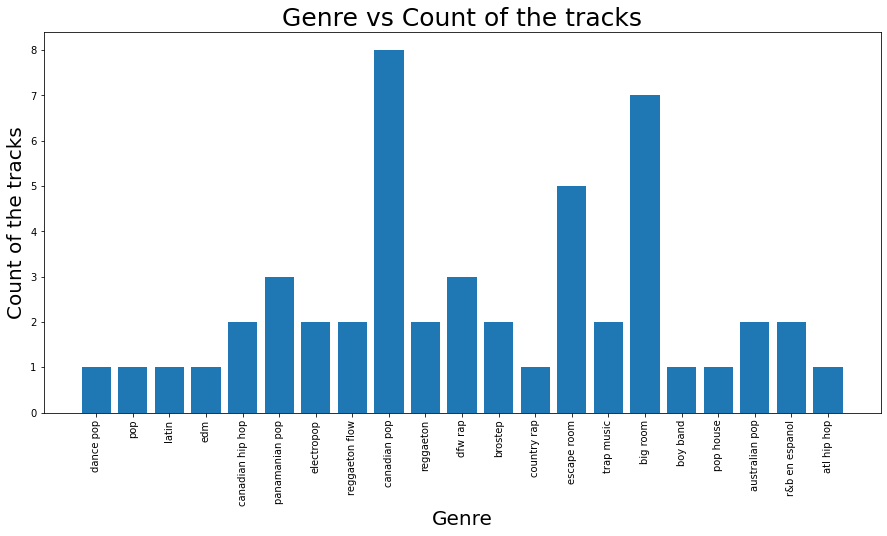

In [169]:
xtick = ['dance pop', 'pop', 'latin', 'edm', 'canadian hip hop',
'panamanian pop', 'electropop', 'reggaeton flow', 'canadian pop',
'reggaeton', 'dfw rap', 'brostep', 'country rap', 'escape room',
'trap music', 'big room', 'boy band', 'pop house', 'australian pop',
'r&b en espanol', 'atl hip hop']
length = np.arange(len(xtick))
genre_groupby = df.groupby('Genre')['track_name'].agg(len)
plt.figure(figsize = (15,7))
plt.bar(length, genre_groupby)
plt.xticks(length,xtick)
plt.xticks(rotation = 90)
plt.xlabel('Genre', fontsize = 20)
plt.ylabel('Count of the tracks', fontsize = 20)
plt.title('Genre vs Count of the tracks', fontsize = 25)

In [170]:
# plt.xticks(df['Popularity'])
# plt.hist(df['Popularity'].value_counts(), bins=10,color= 'g' )

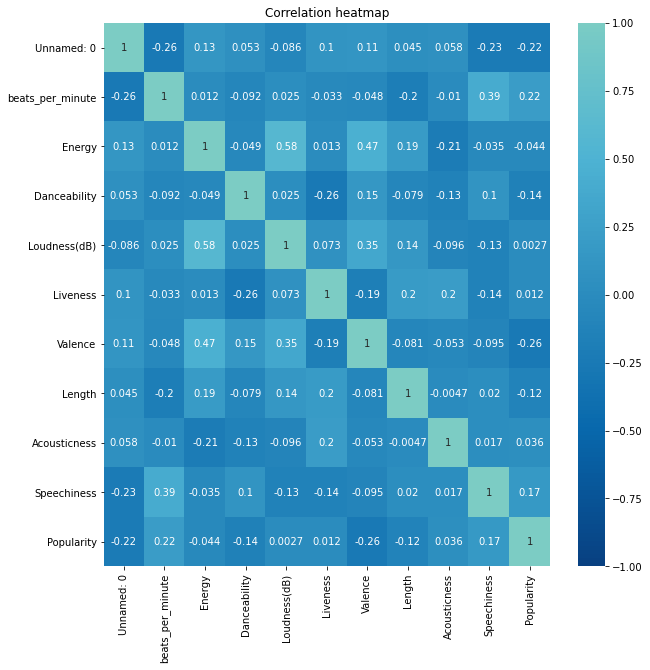

In [173]:
# heatmap of the correlation 
plt.figure(figsize=(10,10))
plt.title('Correlation heatmap')
sns.heatmap(correlation,annot=True,vmin=-1,vmax=1,cmap="GnBu_r",center=1)

Text(0.5, 1.0, 'Artist Name vs Count of songs')

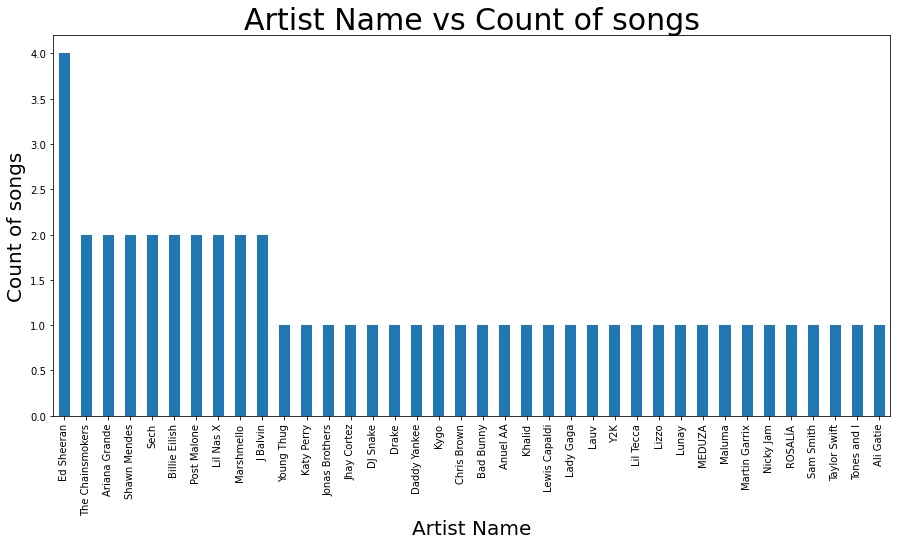

In [174]:
fig = plt.figure(figsize = (15,7))
df.groupby('artist_name')['track_name'].agg(len).sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('Artist Name', fontsize = 20)
plt.ylabel('Count of songs', fontsize = 20)
plt.title('Artist Name vs Count of songs', fontsize = 30)

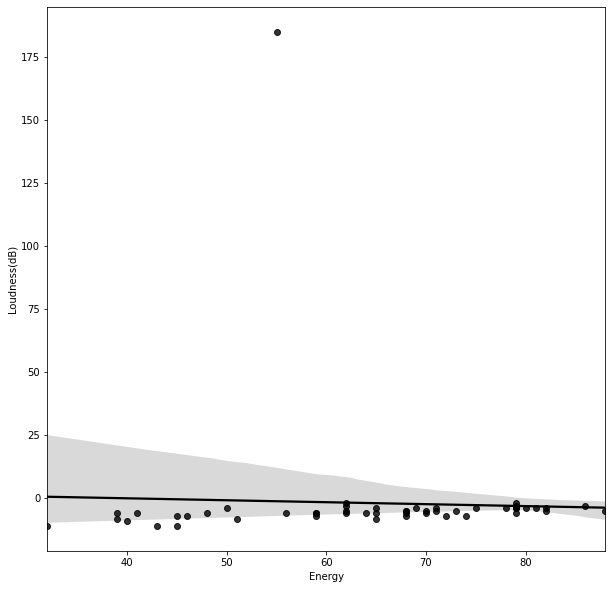

In [178]:
# Analysing the relationship between energy and loudness
fig = plt.subplots(figsize=(10, 10))
sns.regplot(x='Energy', y='Loudness(dB)', data=df, color='black')

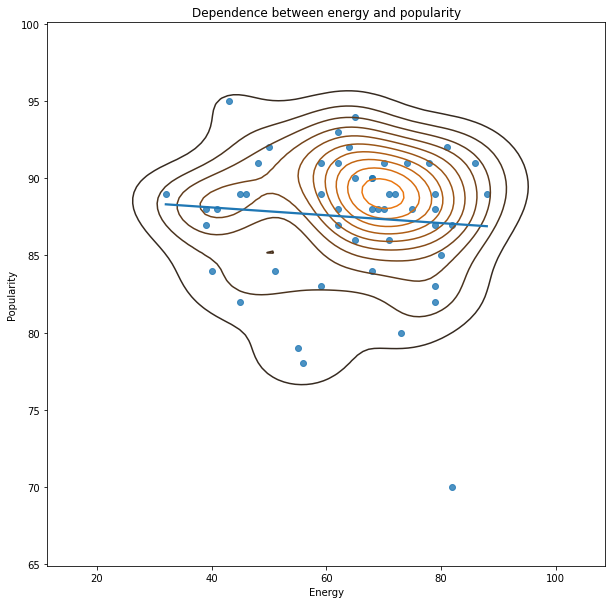

In [179]:
fig=plt.subplots(figsize=(10,10))
plt.title('Dependence between energy and popularity')
sns.regplot(x='Energy', y='Popularity',
            ci=None, data=df)
sns.kdeplot(df.Energy,df.Popularity)

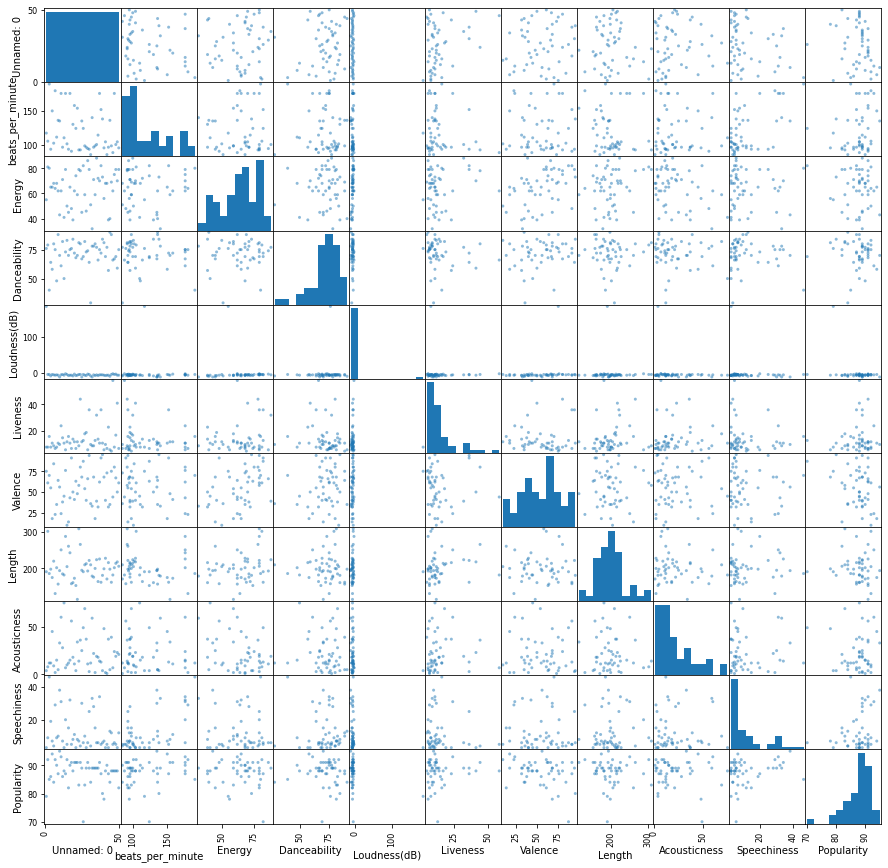

In [182]:
scatter_matrix(df)
plt.gcf().set_size_inches(15, 15)
plt.show()

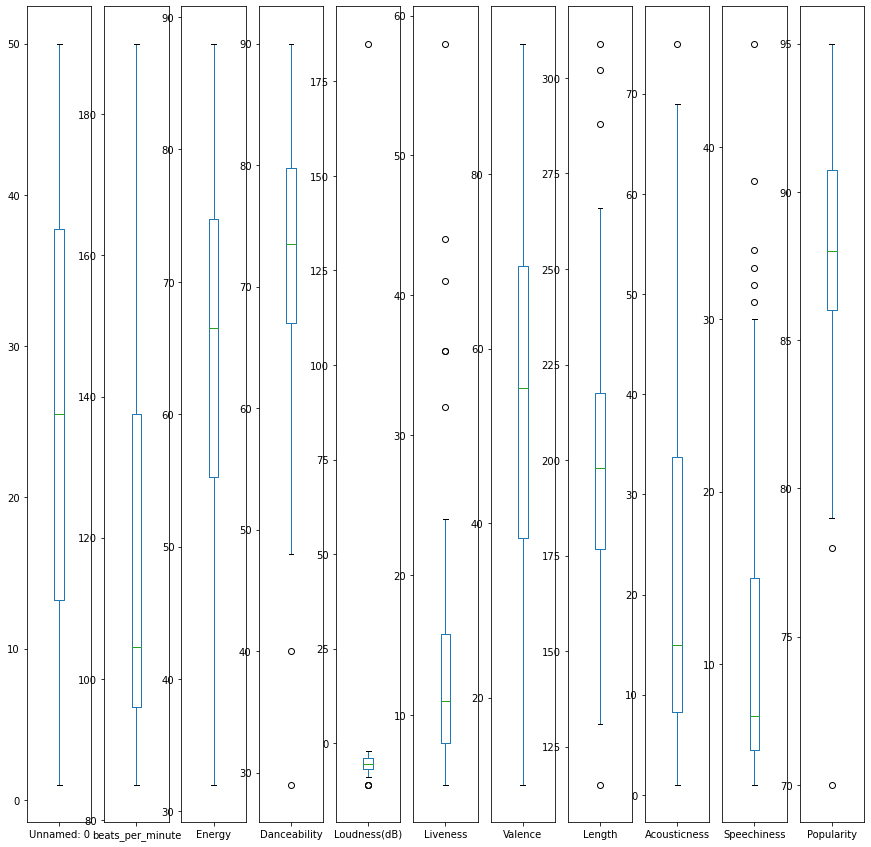

In [184]:
df.plot(kind='box', subplots=True)
plt.gcf().set_size_inches(15,15)
plt.show()

In [185]:
import squarify as sq

plt.figure(figsize=(14,8))
sq.plot(sizes=df.Genre.value_counts(), label=df["Genre"].unique(), alpha=.8 )
plt.axis('off')
plt.show()

NameError: name 'sq' is not defined

<Figure size 1008x576 with 0 Axes>

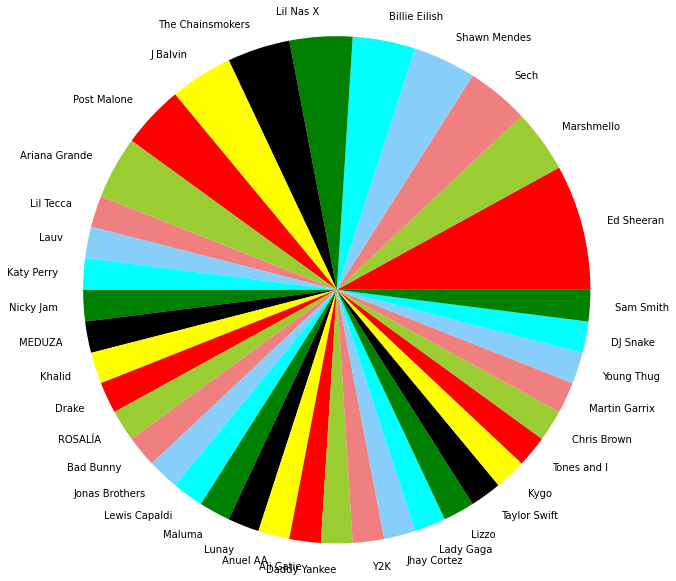

In [186]:
#Pie charts 
labels = df.artist_name.value_counts().index
sizes = df.artist_name.value_counts().values
colors = ['red', 'yellowgreen', 'lightcoral', 'lightskyblue','cyan', 'green', 'black','yellow']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, colors=colors)
autopct=('%1.1f%%')
plt.axis('equal')
plt.show()

In [187]:
#Linear regression, first create test and train dataset
x=df.loc[:,['Energy','Danceability','Length','Loudness(dB)','Acousticness']].values
y=df.loc[:,'Popularity'].values

In [188]:
# Creating a test and training dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [189]:
# Linear regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

98.53632277257331
[-0.04923933 -0.06626572 -0.01120808 -0.04981144 -0.05766946]


In [190]:
#Displaying the difference between the actual and the predicted
y_pred = regressor.predict(X_test)
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_output)

    Actual  Predicted
0       92     89.130
1       91     84.536
2       88     85.442
3       84     87.151
4       89     88.090
5       95     88.251
6       82     86.455
7       88     88.766
8       82     88.413
9       88     86.729
10      85     89.369
11      88     86.955
12      91     86.435
13      87     86.277
14      92     85.666


In [191]:
#Checking the accuracy of Linear Regression
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.5095556976212396
Mean Squared Error: 17.180764939081353
Root Mean Squared Error: 4.144968629444782


Text(0, 0.5, 'Test values')

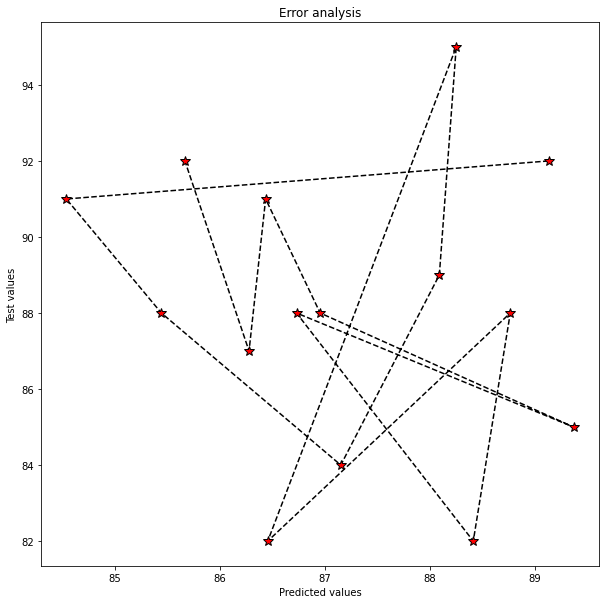

In [192]:
plt.figure(figsize=(10,10))
plt.plot(y_pred,y_test,color='black',linestyle='dashed',marker='*',markerfacecolor='red',markersize=10)
plt.title('Error analysis')
plt.xlabel('Predicted values')
plt.ylabel('Test values')

In [193]:
# Cross validation score
x=df.loc[:,['Energy','Danceability']].values
y=df.loc[:,'Popularity'].values
regressor=LinearRegression()
mse=cross_val_score(regressor,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
mse_mean=np.mean(mse)
print(mse_mean)
diff=metrics.mean_squared_error(y_test, y_pred)-abs(mse_mean)
print(diff)

-341.50409533852746
-324.3233303994461


In [194]:
x=df.loc[:,['artist_name']].values
y=df.loc[:,'Genre'].values

In [195]:
# Label encoding of features
x.shape
encoder=LabelEncoder()
x = encoder.fit_transform(x)
x=pd.DataFrame(x)
x

,0
0,32
1,1
2,2
3,9
4,28
5,9
6,20
7,30
8,19
9,4


In [196]:
# Label Encoding of target
Encoder_y=LabelEncoder()
Y = Encoder_y.fit_transform(y)
Y=pd.DataFrame(Y)
Y

,0
0,6
1,19
2,8
3,15
4,9
5,15
6,20
7,15
8,7
9,11


In [197]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

#Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

In [198]:
# KNN Classification
# sorted(sklearn.neighbors.VALID_METRICS['brute'])
knn = KNeighborsClassifier(n_neighbors = 17)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [199]:
error=[]
for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Mean error')

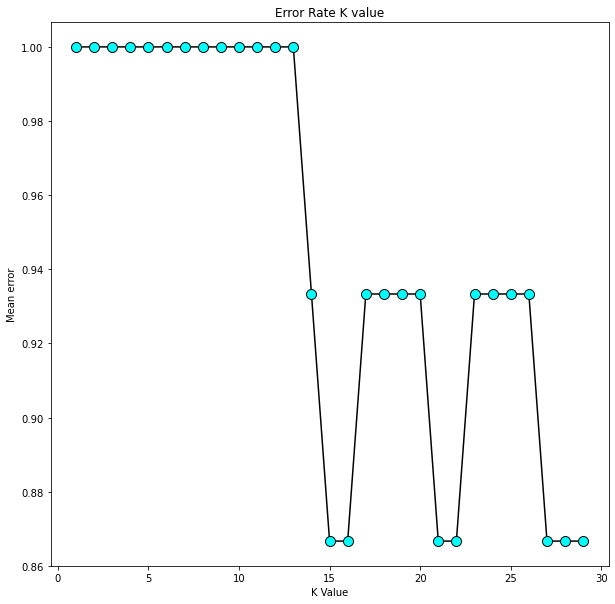

In [200]:
plt.figure(figsize=(10,10))
plt.plot(range(1,30),error,color='black',marker='o',markerfacecolor='cyan',markersize=10)
plt.title('Error Rate K value')
plt.xlabel('K Value')
plt.ylabel('Mean error')

In [201]:
x=df.loc[:,['Energy','Length','Danceability','beats_per_minute', 'Acousticness']].values
y=df.loc[:,'Popularity'].values

In [202]:
# Creating a test and training dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [203]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred=gnb.predict(X_test)
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_output)

    Actual  Predicted
0       86         83
1       89         91
2       89         89
3       92         91
4       87         92
5       84         88
6       90         88
7       88         89
8       87         89
9       87         91
10      80         88
11      89         88
12      94         88
13      88         88
14      84         89


In [204]:
# Testing the accuracy of Naive Bayes 
scores=cross_val_score(gnb,X_train,y_train,scoring='accuracy',cv=3).mean()*100
print(scores)

11.616161616161618


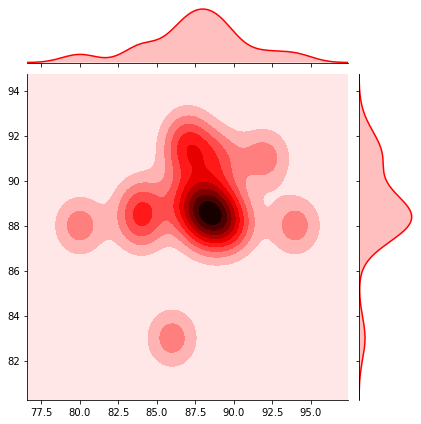

In [205]:
sns.jointplot(x=y_test, y=y_pred, kind="kde", color="r")

In [206]:
x=df.loc[:,['Energy','Length','Danceability','beats_per_minute', 'Acousticness']].values
y=df.loc[:,'Popularity'].values

In [207]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [208]:
# Linear SVM model 
LinSVC = LinearSVC(penalty='l2', loss='squared_hinge', dual=True)
LinSVC.fit(X_train, y_train)
y_pred=gnb.predict(X_test)
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_output)

    Actual  Predicted
0       89         91
1       91         91
2       79         79
3       84         89
4       91         90
5       82         82
6       78         78
7       89         88
8       92         89
9       90         90
10      88         88
11      88         88
12      89         89
13      89         89
14      70         70


In [209]:
# Testing the accuracy
scores=cross_val_score(LinSVC,X_train,y_train,scoring='accuracy',cv=3).mean()*100
print(scores)

8.585858585858585


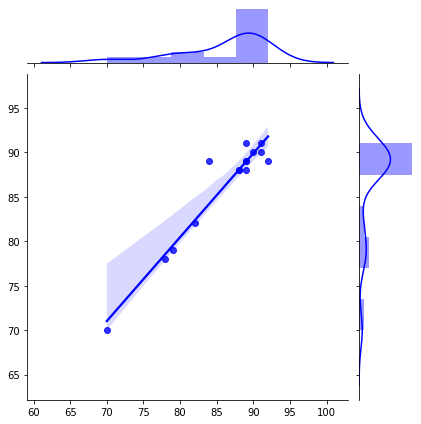

In [210]:
sns.jointplot(x=y_test, y=y_pred, kind="reg", color="b");